In [1]:
import numpy as np

In [2]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import load_model, Model
import tensorflow as tf

In [3]:
#!wget https://github.com/philipperemy/keras-attention-mechanism/raw/master/attention/attention.py

In [4]:
from layers.attention import Attention #Luong

In [5]:
num_samples, time_steps, input_dim, output_dim = 100, 10, 1, 1
data_x = np.random.uniform(size=(num_samples, time_steps, input_dim))
data_y = np.random.uniform(size=(num_samples, output_dim))

In [6]:
# Define/compile the model.
model_input = Input(shape=(time_steps, input_dim))
x = LSTM(64, return_sequences=True)(model_input)
x = Attention(32)(x)
x = Dense(1)(x)
model = Model(model_input, x)
model.compile(loss='mae', optimizer='adam')

In [7]:
print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10, 1)]      0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 10, 64)       16896       input_1[0][0]                    
__________________________________________________________________________________________________
last_hidden_state (Lambda)      (None, 64)           0           lstm[0][0]                       
__________________________________________________________________________________________________
attention_score_vec (Dense)     (None, 10, 64)       4096        lstm[0][0]                       
_______________________________________________________________________________________

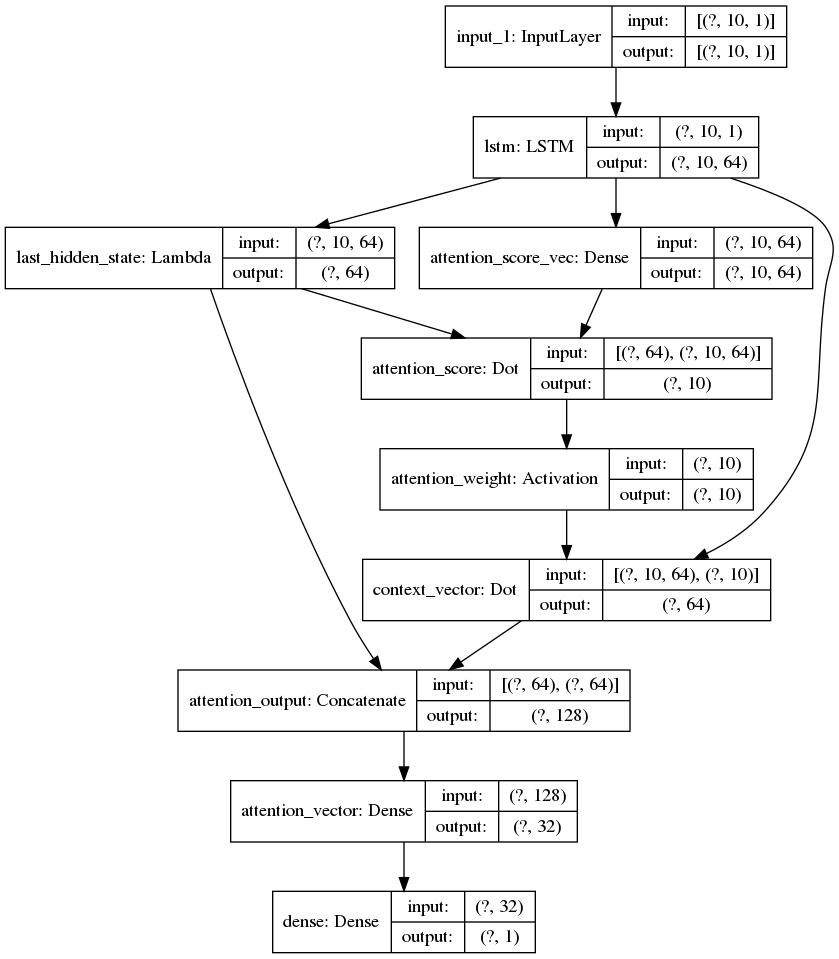

In [8]:
tf.keras.utils.plot_model(model, to_file="model_hello_luong.png", show_shapes=True)

In [9]:
# train.
hist = model.fit(data_x, data_y, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 4ms/step - loss: 0.3626
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 0.2797
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 0.2727
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.2894
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 0.2764
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2615
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2648
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2714
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2671
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2605


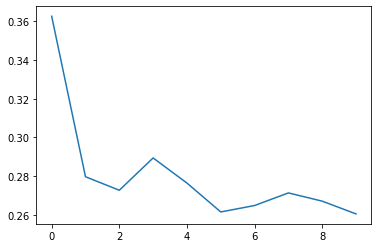

In [14]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.show()

In [17]:
data_x.shape, data_y.shape

((100, 10, 1), (100, 1))

In [15]:
# test save/reload model.
pred1 = model.predict(data_x)
model.save('test_model.h5')
model_h5 = load_model('test_model.h5')
pred2 = model_h5.predict(data_x)
np.testing.assert_almost_equal(pred1, pred2)
print('Success.')

Success.


* https://github.com/philipperemy/keras-attention-mechanism/